## Lab1 Machine Learning Balumatkina DA-01

#### initializyng all functions + libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
toler = 0.000001
learn_rate = 0.007

def scan_data(file):
    return np.genfromtxt(file, delimiter=",", skip_header=1)


def mse_loss_function(database_row, predicted_row):
    result = sum((predicted_row[i] - database_row[i]) ** 2 for i in range(len(predicted_row)))
    return result / len(predicted_row)


def linear_regression(b0, b1, x):
    return b0 + np.multiply(b1, x)

In [3]:
def db_plot(data, plot_color, title):
    x_data, y_data = list(data[:, 1]), list(data[:, 2])
    plt.title(title)
    plt.plot(x_data, y_data, plot_color)

def total_plot(x_train, y_train, x_test, y_test, train_color, test_color, train_model_work, title):
  plt.title(title)
  plt.xlabel('x values') 
  plt.ylabel('y values') 
  plt.plot(x_train, y_train, train_color,
         x_test, y_test, test_color,
         [0, 1], [linear_regression(train_model_work["beta 0"], train_model_work["beta 1"], 0), linear_regression(train_model_work["beta 0"], train_model_work["beta 1"], 1)])

In [4]:
def train(rows):
    epoch_numb = 0
    delta = 100

    b0 = np.random.randn(1)
    b1 = np.random.randn(1)

    x_column = rows[:, 1]
    y_column =  rows[:, 2]

    y_predict = [linear_regression(b0, b1, x) for x in x_column]
    loss = mse_loss_function(y_column, y_predict)
   
    while toler < delta:
        y_predict = [linear_regression(b0, b1, x) for x in x_column]
        y_difference = [(expected - predicted) for (expected, predicted) in zip(y_column, y_predict)]

        b0_derivative = - (2 / len(y_difference)) * np.sum(y_difference)
        sum_value = np.dot(x_column, y_difference)
        b1_derivative = - (2 / len(y_difference)) * sum_value

        b0 = b0 - learn_rate * b0_derivative
        b1 = b1 - learn_rate * b1_derivative

        y_predict = [linear_regression(b0, b1, x) for x in x_column]
        current_loss = mse_loss_function(y_column, y_predict)
        delta = loss - current_loss
        loss = current_loss

        print(f"epoch #{epoch_numb}: beta 0 = {b0[0]} | beta 1 = {b1[0]} | mse loss = {current_loss[0]}")
        
        epoch_numb += 1

    return {
        "beta 0": b0[0],
        "beta 1": b1[0],
        "epoch amount": epoch_numb,
        "mse loss function value": loss[0]
    }

#### analyzing training database + building graph

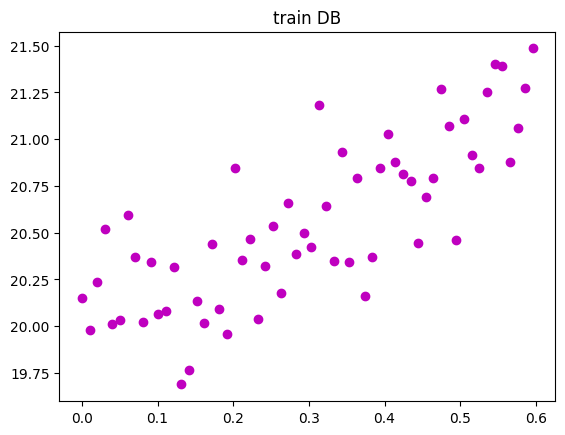

In [5]:
train_DB = scan_data("lab_1_train.csv")
db_plot(train_DB, 'mo', "train DB")

#### analyzing test database + building graph

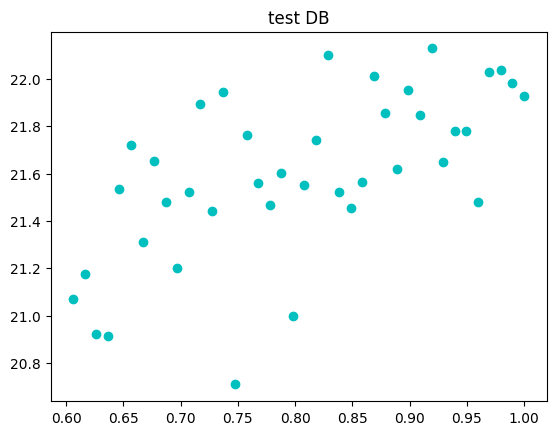

In [6]:
test_DB = scan_data("lab_1_test.csv")
db_plot(test_DB, 'co', "test DB")

#### training

In [7]:
train_model_work = train(train_DB)
train_model_work

epoch #0: beta 0 = -1.2437356883296442 | beta 1 = 0.6280024294463888 | mse loss = 466.9553149859519
epoch #1: beta 0 = -0.9412493525372925 | beta 1 = 0.7187159336167478 | mse loss = 452.81744502245874
epoch #2: beta 0 = -0.6433762565290878 | beta 1 = 0.8080159230769042 | mse loss = 439.10828242735175
epoch #3: beta 0 = -0.3500459181644631 | beta 1 = 0.8959240056428164 | mse loss = 425.8148268979078
epoch #4: beta 0 = -0.0611889321945161 | beta 1 = 0.9824614589815065 | mse loss = 412.92447235842354
epoch #5: beta 0 = 0.22326304619176196 | beta 1 = 1.0676492356553904 | mse loss = 400.4249950054955
epoch #6: beta 0 = 0.5033773175698613 | beta 1 = 1.151507968089536 | mse loss = 388.304541715824
epoch #7: beta 0 = 0.7792201542345731 | beta 1 = 1.2340579734630261 | mse loss = 376.55161880554255
epoch #8: beta 0 = 1.0508568159110372 | beta 1 = 1.3153192585255882 | mse loss = 365.1550811304156
epoch #9: beta 0 = 1.3183515652257394 | beta 1 = 1.3953115243406289 | mse loss = 354.10412151656493
e

{'beta 0': 19.897475182209497,
 'beta 1': 2.182486754553042,
 'epoch amount': 7999,
 'mse loss function value': 0.0743078890209772}

#### Mean Squarred Error loss value

In [8]:
x_train, y_train = list(train_DB[:, 1]), list(train_DB[:, 2])
x_test, y_test = list(test_DB[:, 1]), list(test_DB[:, 2])
y_predict = [linear_regression(train_model_work["beta 0"], train_model_work["beta 1"], x) for x in x_test]
print(f"mse loss value: {mse_loss_function(y_test, y_predict)}")

mse loss value: 0.07711098118146856


#### building total graph

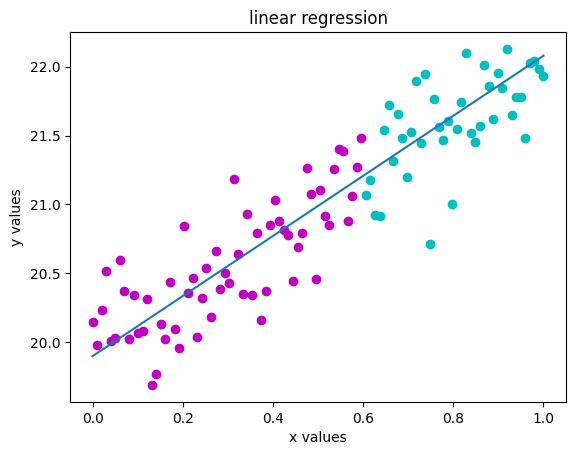

In [9]:
total_plot(x_train, y_train, x_test, y_test, 'om', 'oc', train_model_work, "linear regression")